In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
f = open("darksky_api.key", "r")
api_key = f.readline()

In [3]:
url = 'https://api.darksky.net/forecast/'+api_key+'/42.3601,-71.0589'

response = requests.get(url)
print(response)
print(type(response.text))
print(response.text)
print(response.text[:200])

<Response [200]>
<class 'str'>
{"latitude":42.3601,"longitude":-71.0589,"timezone":"America/New_York","currently":{"time":1552172753,"summary":"Clear","icon":"clear-night","nearestStormDistance":218,"nearestStormBearing":213,"precipIntensity":0,"precipProbability":0,"temperature":38.55,"apparentTemperature":36.15,"dewPoint":12.33,"humidity":0.34,"pressure":1028.85,"windSpeed":3.5,"windGust":9.02,"windBearing":94,"cloudCover":0.01,"uvIndex":0,"visibility":2.44,"ozone":381.84},"minutely":{"summary":"Clear for the hour.","icon":"clear-night","data":[{"time":1552172700,"precipIntensity":0,"precipProbability":0},{"time":1552172760,"precipIntensity":0,"precipProbability":0},{"time":1552172820,"precipIntensity":0,"precipProbability":0},{"time":1552172880,"precipIntensity":0,"precipProbability":0},{"time":1552172940,"precipIntensity":0,"precipProbability":0},{"time":1552173000,"precipIntensity":0,"precipProbability":0},{"time":1552173060,"precipIntensity":0,"precipProbability":0},{"time":15521

In [4]:
response.json().keys()

dict_keys(['latitude', 'longitude', 'timezone', 'currently', 'minutely', 'hourly', 'daily', 'flags', 'offset'])

In [5]:
print(len(response.json()['timezone']))

16


In [6]:
df = pd.DataFrame(response.json()['hourly']['data'])
df.head()


,apparentTemperature,cloudCover,dewPoint,humidity,icon,ozone,precipAccumulation,precipIntensity,precipProbability,precipType,pressure,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed
0,36.94,0.00,11.35,0.31,fog,382.22,NaN,0.0000,0.00,NaN,1028.76,Foggy,39.08,1552172400,0,1.64,93,8.92,3.33
1,28.94,0.02,18.23,0.53,clear-night,378.36,0.007,0.0009,0.02,snow,1029.69,Clear,33.62,1552176000,0,9.83,98,9.93,5.03
2,25.61,0.09,23.05,0.70,clear-night,376.49,0.000,0.0002,0.01,snow,1030.25,Clear,31.53,1552179600,0,10.00,94,11.89,6.08
3,25.11,0.24,23.06,0.71,clear-night,375.74,0.007,0.0008,0.01,snow,1030.62,Clear,31.20,1552183200,0,10.00,95,13.13,6.22
4,24.30,0.27,23.08,0.73,partly-cloudy-night,374.69,0.016,0.0019,0.01,snow,1030.69,Partly Cloudy,30.78,1552186800,0,10.00,95,14.69,6.62


In [7]:
df.tail()

,apparentTemperature,cloudCover,dewPoint,humidity,icon,ozone,precipAccumulation,precipIntensity,precipProbability,precipType,pressure,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed
44,36.65,0.30,30.14,0.59,partly-cloudy-day,389.07,NaN,0.0,0.0,NaN,1011.96,Partly Cloudy,43.61,1552330800,2,10.0,266,29.30,14.35
45,37.21,0.34,30.11,0.58,partly-cloudy-day,393.62,NaN,0.0,0.0,NaN,1011.53,Partly Cloudy,43.95,1552334400,1,10.0,266,30.12,13.93
46,36.85,0.36,29.82,0.58,partly-cloudy-day,397.49,NaN,0.0,0.0,NaN,1011.39,Partly Cloudy,43.57,1552338000,1,10.0,267,30.81,13.49
47,36.03,0.33,29.06,0.58,partly-cloudy-day,398.91,NaN,0.0,0.0,NaN,1011.82,Partly Cloudy,42.76,1552341600,0,10.0,267,31.28,12.87
48,32.69,0.28,28.03,0.62,partly-cloudy-night,399.65,NaN,0.0,0.0,NaN,1012.53,Partly Cloudy,39.94,1552345200,0,10.0,270,31.61,12.24


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 19 columns):
apparentTemperature    49 non-null float64
cloudCover             49 non-null float64
dewPoint               49 non-null float64
humidity               49 non-null float64
icon                   49 non-null object
ozone                  49 non-null float64
precipAccumulation     10 non-null float64
precipIntensity        49 non-null float64
precipProbability      49 non-null float64
precipType             30 non-null object
pressure               49 non-null float64
summary                49 non-null object
temperature            49 non-null float64
time                   49 non-null int64
uvIndex                49 non-null int64
visibility             49 non-null float64
windBearing            49 non-null int64
windGust               49 non-null float64
windSpeed              49 non-null float64
dtypes: float64(13), int64(3), object(3)
memory usage: 7.4+ KB


In [9]:
df.describe()

,apparentTemperature,cloudCover,dewPoint,humidity,ozone,precipAccumulation,precipIntensity,precipProbability,pressure,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed
count,49.000000,49.000000,49.000000,49.000000,49.000000,10.000000,49.000000,49.000000,49.000000,49.000000,4.900000e+01,49.000000,49.000000,49.000000,49.000000,49.000000
mean,29.576531,0.704286,30.939592,0.803469,367.135102,0.080500,0.013053,0.162041,1019.522857,36.912857,1.552259e+09,0.714286,6.940612,179.142857,24.663265,11.029796
std,5.487495,0.351384,6.449146,0.154954,13.711264,0.157322,0.026847,0.247933,8.499634,4.554126,5.143928e+04,1.099242,3.702925,71.916039,7.171118,3.131014
min,21.880000,0.000000,11.350000,0.310000,349.890000,0.000000,0.000000,0.000000,1011.320000,30.170000,1.552172e+09,0.000000,0.000000,93.000000,8.920000,3.330000
25%,24.250000,0.330000,26.620000,0.710000,356.450000,0.005500,0.000000,0.000000,1011.960000,32.930000,1.552216e+09,0.000000,3.580000,116.000000,20.610000,9.540000
50%,28.940000,0.900000,31.190000,0.830000,363.170000,0.010000,0.000400,0.010000,1013.220000,36.560000,1.552259e+09,0.000000,9.830000,151.000000,24.890000,10.570000
75%,35.320000,1.000000,35.740000,0.950000,375.740000,0.036250,0.004400,0.200000,1029.690000,41.210000,1.552302e+09,1.000000,10.000000,248.000000,29.300000,13.130000
max,37.210000,1.000000,41.160000,0.970000,399.650000,0.480000,0.090700,0.780000,1031.820000,43.950000,1.552345e+09,4.000000,10.000000,324.000000,37.810000,17.060000


In [10]:
df2 = df.drop('dewPoint',axis = 1)

In [11]:
df2.head()

,apparentTemperature,cloudCover,humidity,icon,ozone,precipAccumulation,precipIntensity,precipProbability,precipType,pressure,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed
0,36.94,0.00,0.31,fog,382.22,NaN,0.0000,0.00,NaN,1028.76,Foggy,39.08,1552172400,0,1.64,93,8.92,3.33
1,28.94,0.02,0.53,clear-night,378.36,0.007,0.0009,0.02,snow,1029.69,Clear,33.62,1552176000,0,9.83,98,9.93,5.03
2,25.61,0.09,0.70,clear-night,376.49,0.000,0.0002,0.01,snow,1030.25,Clear,31.53,1552179600,0,10.00,94,11.89,6.08
3,25.11,0.24,0.71,clear-night,375.74,0.007,0.0008,0.01,snow,1030.62,Clear,31.20,1552183200,0,10.00,95,13.13,6.22
4,24.30,0.27,0.73,partly-cloudy-night,374.69,0.016,0.0019,0.01,snow,1030.69,Partly Cloudy,30.78,1552186800,0,10.00,95,14.69,6.62


Text(0, 0.5, 'Number of Occurences')

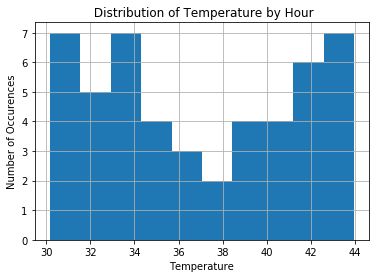

In [12]:
df['temperature'].hist()
plt.title(' Distribution of Temperature by Hour')
plt.xlabel('Temperature')
plt.ylabel('Number of Occurences')

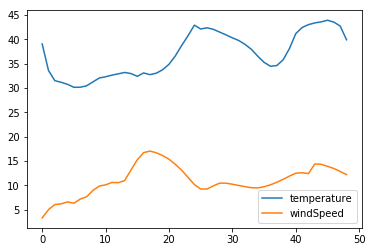

In [13]:
df[['temperature','windSpeed']].plot.line()

In [ ]:
# Comment:
#There is a correlation between temperature and windSpeed

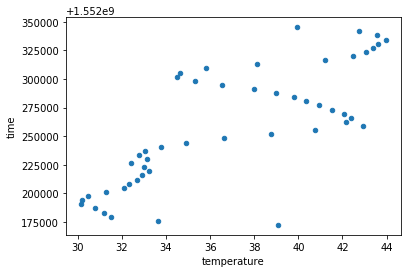

In [14]:
df.plot.scatter(x='temperature', y='time')

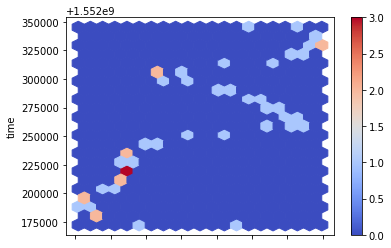

In [15]:
df.plot.hexbin(x='temperature', y='time', gridsize=20, cmap = 'coolwarm')

Text(0, 0.5, 'Number of Occurences')

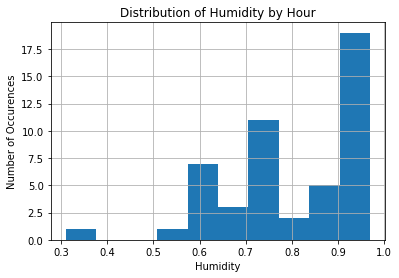

In [16]:
df.humidity.hist()
plt.title('Distribution of Humidity by Hour')
plt.xlabel('Humidity')
plt.ylabel('Number of Occurences')

In [26]:
import sqlite3
connection = sqlite3.connect(':memory:')
cursor = connection.cursor()
# 'flatironmidtermproject.db'
create_table = '''CREATE TABLE weather (time INTEGER PRIMARY KEY, summary TEXT, temperature FLOAT, windSpeed FLOAT);'''

cursor.execute(create_table)


In [27]:
describe_table = '''PRAGMA table_info([weather]);'''
cursor.execute(describe_table).fetchall()

[(0, 'time', 'INTEGER', 0, None, 1),
 (1, 'summary', 'TEXT', 0, None, 0),
 (2, 'temperature', 'FLOAT', 0, None, 0),
 (3, 'windSpeed', 'FLOAT', 0, None, 0)]

In [28]:
df3 = df[['time','summary','temperature','windSpeed']]

for i in range(len(df3)):
    sql = "INSERT INTO weather VALUES (?,?,?,?)"
    params = (
        int(df3['time'][i]),
        str(df3['summary'][i]),
        float(df3['temperature'][i]),
        float(df3['windSpeed'][i])
    )
    cursor.execute(sql, params)
    
    i = i + 1

fetchall_query = '''SELECT * FROM weather;'''
cursor.execute(fetchall_query).fetchall()

[(1552158000, 'Clear', 44.6, 2.94),
 (1552161600, 'Clear', 45.27, 2.23),
 (1552165200, 'Clear', 44.14, 2.6),
 (1552168800, 'Clear', 39.78, 4.11),
 (1552172400, 'Clear', 35.76, 5.49),
 (1552176000, 'Clear', 32.16, 5.87),
 (1552179600, 'Clear', 31.21, 6.19),
 (1552183200, 'Clear', 30.68, 6.29),
 (1552186800, 'Partly Cloudy', 30.26, 6.29),
 (1552190400, 'Partly Cloudy', 30.01, 6.91),
 (1552194000, 'Partly Cloudy', 30.28, 7.78),
 (1552197600, 'Partly Cloudy', 30.82, 8.58),
 (1552201200, 'Mostly Cloudy', 31.32, 8.99),
 (1552204800, 'Mostly Cloudy', 31.76, 9.54),
 (1552208400, 'Mostly Cloudy', 31.95, 9.88),
 (1552212000, 'Mostly Cloudy', 32.11, 10.39),
 (1552215600, 'Overcast', 32.55, 10.26),
 (1552219200, 'Overcast', 32.89, 10.53),
 (1552222800, 'Overcast', 32.71, 11.65),
 (1552226400, 'Snow', 32.25, 13.14),
 (1552230000, 'Snow', 32.93, 14.08),
 (1552233600, 'Rain', 32.52, 13.86),
 (1552237200, 'Rain', 32.85, 13.13),
 (1552240800, 'Rain', 33.6, 12.41),
 (1552244400, 'Rain', 34.7, 11.78),
 (

In [73]:
#ALTERNATIVE METHOD
#df3 = df[['time','summary','temperature','windSpeed']]

#from sqlalchemy import create_engine
#engine = create_engine('sqlite://', echo=False)

#df3.to_sql('weather', con=engine)
#engine.execute("SELECT * FROM weather").fetchall()

[(0, 1551794400, 'Clear', 22.85, 8.2),
 (1, 1551798000, 'Clear', 24.41, 6.03),
 (2, 1551801600, 'Clear', 25.74, 5.89),
 (3, 1551805200, 'Clear', 27.11, 6.47),
 (4, 1551808800, 'Clear', 28.45, 6.81),
 (5, 1551812400, 'Clear', 29.58, 7.04),
 (6, 1551816000, 'Clear', 30.21, 7.06),
 (7, 1551819600, 'Partly Cloudy', 30.17, 7.02),
 (8, 1551823200, 'Partly Cloudy', 29.1, 6.37),
 (9, 1551826800, 'Partly Cloudy', 27.18, 5.73),
 (10, 1551830400, 'Partly Cloudy', 23.74, 5.56),
 (11, 1551834000, 'Partly Cloudy', 22.07, 5.62),
 (12, 1551837600, 'Partly Cloudy', 20.71, 5.73),
 (13, 1551841200, 'Partly Cloudy', 19.96, 5.85),
 (14, 1551844800, 'Mostly Cloudy', 19.53, 5.75),
 (15, 1551848400, 'Mostly Cloudy', 20.06, 5.73),
 (16, 1551852000, 'Overcast', 20.75, 6.04),
 (17, 1551855600, 'Overcast', 21.03, 6.85),
 (18, 1551859200, 'Overcast', 21.04, 8.01),
 (19, 1551862800, 'Overcast', 20.65, 8.98),
 (20, 1551866400, 'Mostly Cloudy', 19.22, 9.6),
 (21, 1551870000, 'Mostly Cloudy', 17.59, 10.08),
 (22, 1551